WT 5 ['WT'] 174
WT 30 ['WT_30s'] 126
WT 64 ['121621WT_30m2h64bp', '051122WT_30m2h64bp', '051822WT_30m2h64bp'] 154
Epoch 1/5
40000/40000 [==============================] - 4s 96us/step - loss: 0.0426
Epoch 2/5
40000/40000 [==============================] - 4s 96us/step - loss: 0.0180
Epoch 3/5
40000/40000 [==============================] - 4s 92us/step - loss: 0.0131
Epoch 4/5
40000/40000 [==============================] - 4s 92us/step - loss: 0.0125
Epoch 5/5
40000/40000 [==============================] - 4s 92us/step - loss: 0.0124


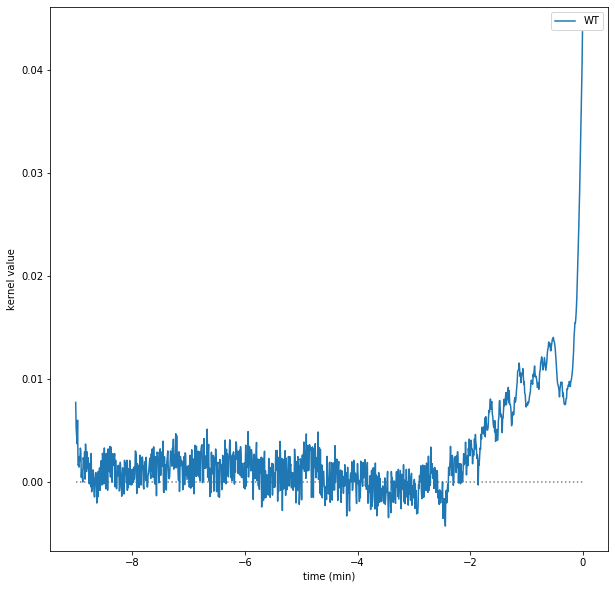

In [7]:
%matplotlib inline
from tools.kernelInference import inferKernel
import matplotlib.pyplot as plt
fig, kernel, bias=inferKernel(['WT',],exclude=[],kernel_size=120*9)
plt.show()

In [2]:
# fig.savefig('plots/kernelTest.png')

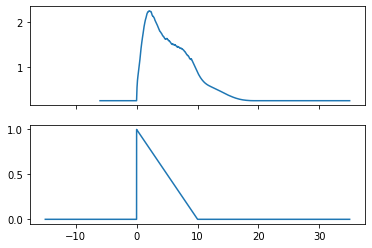

In [25]:
from tools.kernelInference import predictResponse
import numpy as np
import matplotlib.pyplot as plt
# kernel=[np.ones(120)/120]
# bias=[1]
tp = np.arange(-15,35,1/120)
loc = np.argmin(tp**2)
U = np.zeros(tp.size)
dur=10*120
U[loc:loc+dur]= 1-(tp[loc:loc+dur]*120/dur)


z = predictResponse(kernel[0],bias[0],U)
fig, ax = plt.subplots(nrows=2,sharex=True)
ax[0].plot(tp,z)
ax[1].plot(tp,U)

In [5]:
U.shape

(4800,)

### Demo Plot--Response


Text(0, 0.5, 'Kernel')

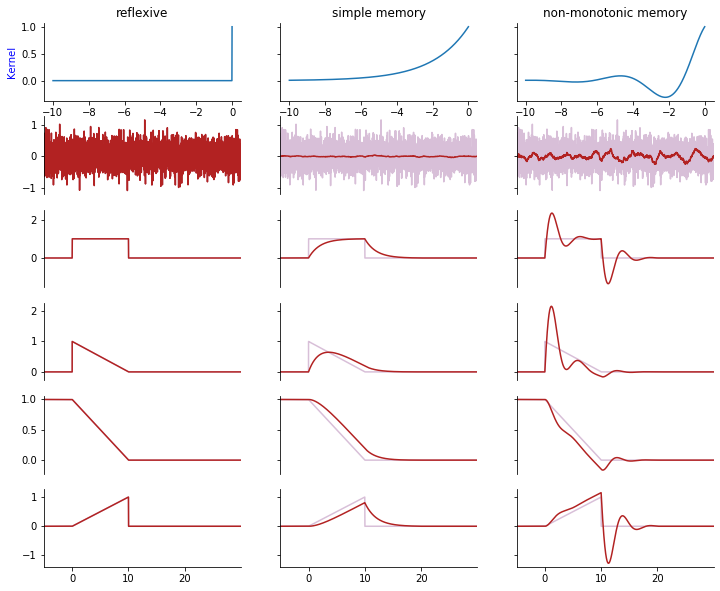

In [76]:
'''stimuli to test'''
tp=np.arange(-15,30,1/120)
U_noise = np.random.normal(0,.3,tp.size)#1*np.sin(tp*2*np.pi/.5)#
U_step = np.zeros(tp.size)
loc = np.argmin(tp**2)
U_step[loc:loc+10*120]=1

U_ramp = np.zeros(tp.size)
dur = 10
st=1
en=0
U_ramp[loc:loc+dur*120] = tp[loc:loc+dur*120]/dur * (en-st) + st

U_ramp_eq = np.zeros(tp.size)
dur = 10
st=1
en=0
U_ramp_eq[loc:loc+dur*120] = tp[loc:loc+dur*120]/dur * (en-st) + st
U_ramp_eq[:loc]=st

U_ramp_up = np.zeros(tp.size)
dur = 10
st=0
en=1
U_ramp_up[loc:loc+dur*120] = tp[loc:loc+dur*120]/dur * (en-st) + st


'''kernels to compare'''
kernel_size = 120*10
k_reflex = np.zeros(kernel_size)
k_reflex[-1] = 1
tp2 = np.arange(kernel_size)/120
lam_decay = 2
k_decay = np.flip(np.exp(-tp2/lam_decay))
k_decay = k_decay/k_decay.sum()
k_real = np.flip(np.exp(-tp2/lam_decay)*np.cos(tp2/5*2*np.pi))
k_real = k_real/k_real.sum()

stimuli = [U_noise,U_step,U_ramp,U_ramp_eq,U_ramp_up]
kernels = [k_reflex,k_decay,k_real]

fig,ax = plt.subplots(nrows=len(stimuli)+1,ncols=len(kernels),figsize=(12,10),sharey='row')

for i,kernel in enumerate(kernels):
    ax[0,i].plot(tp2-tp2.max(),kernel/kernel.max())
    for j,stim in enumerate(stimuli):
        z = predictResponse(kernel,0,stim)
        ax[1+j,i].plot(tp,stim,c='thistle')
        ax[1+j,i].plot(tp,z,c='firebrick')
        ax[1+j,i].set_xlim(tp[kernel_size],tp[-1])
        if j<len(stimuli)-1:
            ax[1+j,i].set_xticks([])
        
for a in np.ravel(ax):
    for s in ['top','right']:
        a.spines[s].set_visible(False)
for a in np.ravel(ax[1:-1]):
    a.spines['bottom'].set_visible(False)

ax[0,0].set_title('reflexive')
ax[0,1].set_title('simple memory')
ax[0,2].set_title('non-monotonic memory')
ax[0,0].set_ylabel('Kernel',color='blue')

## Demo Plot--Concept

Text(0, 0.5, 'Activity')

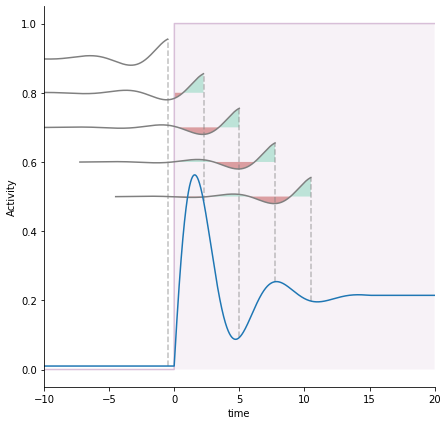

In [153]:
fig= plt.figure(figsize=(7,7))
tp = np.arange(-30,20,1/120)
loc = np.argmin(tp**2)
U=0*tp
U[loc:] = 1

x = np.linspace(-10,1,5)-5.5#[-9,-5,0]
y = np.linspace(1,.5,len(x)+1)[1:]
w = np.abs(y[1]-y[0])

kernel_size = 15*120
tp2 = np.arange(kernel_size)/120
kernel=np.flip(np.exp(-tp2/3)*np.cos(tp2))
kernel = kernel/kernel.max()*.05*1.1
z = predictResponse(kernel,0,U)*.1+.01


plt.plot(tp,U,c='thistle')
plt.fill_between(tp,tp*0,U,facecolor='thistle',alpha=.2)
for xx,yy in zip(x,y):
    plt.plot(tp2+xx,kernel+yy,c='grey')
    ind = np.argmin((tp-xx)**2)+kernel_size
    
    plt.plot([tp[ind],tp[ind]],[z[ind],kernel[-1]+yy],ls='--',c='grey',alpha=.5)
    plt.fill_between(tp2+xx,0*tp2+yy,(kernel)*((tp2+xx)>0)*(kernel>0)+yy,facecolor='mediumaquamarine',alpha=.4)
    plt.fill_between(tp2+xx,0*tp2+yy,(kernel)*((tp2+xx)>0)*(kernel<0)+yy,facecolor='firebrick',alpha=.4)


plt.plot(tp,z)
plt.xlim(-10,20)
ax = fig.gca()
for s in ['top','right']:
    ax.spines[s].set_visible(False)
plt.xlabel('time')
plt.ylabel('Activity')

WT 5 ['WT'] 174
WT 30 ['WT_30s'] 126
WT 64 ['121621WT_30m2h64bp', '051122WT_30m2h64bp', '051822WT_30m2h64bp'] 154
Epoch 1/5
40000/40000 [==============================] - 4s 101us/step - loss: 0.0438
Epoch 2/5
40000/40000 [==============================] - 4s 98us/step - loss: 0.0176
Epoch 3/5
40000/40000 [==============================] - 4s 96us/step - loss: 0.0130
Epoch 4/5
40000/40000 [==============================] - 4s 97us/step - loss: 0.0125
Epoch 5/5
40000/40000 [==============================] - 4s 101us/step - loss: 0.0123


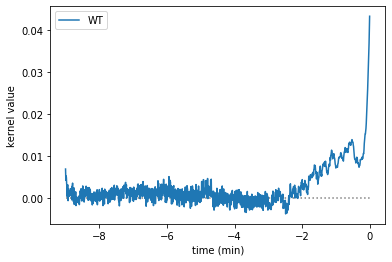

WT 0.1 [] 0
WT 1 ['WT_1s'] 170
WT 5 ['WT'] 174
WT 10 [] 0
WT 30 ['WT_30s'] 126
WT 60 ['WT_60s'] 120
WT 300 [] 0
WT 1 [] 0
WT 2 [] 0
WT 4 ['WT_30m2h4bp'] 163
WT 8 ['WT_30m2h8bp'] 251
WT 16 ['WT_30m2h16bp', '121321WT_30m2h16bp'] 397
WT 32 ['WT_30m2h32bp', '121321WT_30m2h32bp'] 305
WT 64 ['121621WT_30m2h64bp', '051122WT_30m2h64bp', '051822WT_30m2h64bp'] 154
WT 128 ['121621WT_30m2h128bp'] 36
Epoch 1/5
160000/160000 [==============================] - 16s 99us/step - loss: 0.0447
Epoch 2/5
160000/160000 [==============================] - 16s 97us/step - loss: 0.0284
Epoch 3/5
160000/160000 [==============================] - 15s 96us/step - loss: 0.0279
Epoch 4/5
160000/160000 [==============================] - 15s 96us/step - loss: 0.0279
Epoch 5/5
160000/160000 [==============================] - 15s 96us/step - loss: 0.0279


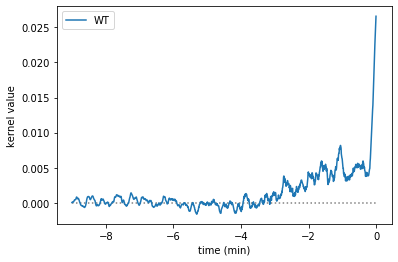

In [3]:
fig, kernel_min, bias_min=inferKernel(['WT',],exclude=[],kernel_size=120*9)
fig, kernel_, bias_=inferKernel(['WT',],exclude=[],kernel_size=120*9,pulses=[.1,1,5,10,30,60,300],
                                     steps=[1,2,4,8,16,32,64,128])


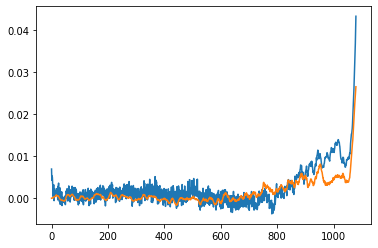

In [5]:
plt.plot(kernel_min[0])
plt.plot(kernel_[0])